# Text Analysis - Feature Selection (TFIDF) 

## BRZOZOWSKI MAREK

## Feature selection using TF-IDF. 

## A jokes dataset will be used to explore 

Term Frequency & Inverse Document Frequency (TF-IDF) is a power feature engineering techniques used to determine which words are important and which words are rare. TF-IDF comprises of two components TF which tands for Term Frquency and IDF, Inverse Document Frequency. TF counts the total unique words present within a document,  while IDF is used to determine the weigts of each word.

In [1]:
# Loading Packages
import os
import nltk
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from nltk.corpus import stopwords

In [2]:
# Reading joke_csv file
jokes=pd.read_csv('jokes_2.csv')

In [3]:
# Quick look at the document
print('Jokes dataset shape: ', jokes.shape)
print(jokes.head(n=5))
print(jokes.describe())

Jokes dataset shape:  (38269, 3)
   ID                                           Question  \
0   1  Did you hear about the Native American man tha...   
1   2       What's the best anti diarrheal prescription?   
2   3  What do you call a person who is outside a doo...   
3   4  Which Star Trek character is a member of the m...   
4   5  What's the difference between a bullet and a h...   

                                Answer  
0  He nearly drown in his own tea pee.  
1                     Mycheexarphlexin  
2                                 Matt  
3                   Jean-Luc Pickacard  
4        A bullet doesn't miss Harambe  
                 ID
count  38269.000000
mean   19135.000000
std    11047.453062
min        1.000000
25%     9568.000000
50%    19135.000000
75%    28702.000000
max    38269.000000


Data Cleaning

In the following we will remove all the stop words from the dataset. The dataset has two columns the Question and the Answer.

In [4]:
def removalStop(dataset,feature):
    # Removal of stopwords
    i = 0
    for txt in dataset[feature]:
        w_list = re.sub(r'[^a-z\s]',' ', txt.lower()).split()
        w_list = [ w for w in w_list if w not in stopwords.words('english')]
        dataset.ix[i,feature] = ' '.join(w_list)
        i+=1
        

In [5]:
removalStop(jokes,'Answer')
removalStop(jokes,'Question')

C:\Users\Marek\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [6]:
jokes.head()

,ID,Question,Answer
0,1,hear native american man drank cups tea,nearly drown tea pee
1,2,best anti diarrheal prescription,mycheexarphlexin
2,3,call person outside door arms legs,matt
3,4,star trek character member magic circle,jean luc pickacard
4,5,difference bullet human,bullet miss harambe


In [7]:
# Separating dataset into question and answers
df_x = jokes['Question']
df_y = jokes['Answer']

Feature Selection: TD-IDF:
Setting up the TD-IDF one needs to Vectorize the dataset. After which a proper shape needs to be implemented for the feature selection. Lastly a simple plot lists the top 5 names in the TF-IDF

In [8]:
def tfidf(dataset,title):
    # Setting a TF-IDF 
    tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, min_df = 1)

    # Converting a collection of raw documents to matrix of TF-IDF features
    tfidf_fit = tfidf_vectorizer.fit_transform(dataset)

    # Return the name of features from the dataset.
    names = tfidf_vectorizer.get_feature_names()

    # Shape of TF-IDF
    print('Shape of TF-IDF ', np.shape(tfidf_fit))

    # Returns a matrix
    dense = tfidf_fit.todense()

    # Summation and sorting of rows
    sum_rows = dense.sum(axis=0)
    sort_list = np.argsort(sum_rows)

    # Printing a list of TF-IDF features
    for k in range( 0, 100, 1):
        print(names[ np.array(sort_list)[0,k]])

    # Plotting top 5 names.
    plotting(tfidf_fit,title,names)


def plotting(fit,description,index_name):
    # Plotting top 5 name in TF-IDF Matrix
    array_data = pd.Series(fit.toarray()[0,:],index= index_name).sort_values(ascending=False)
    sb.barplot(array_data[:5].index, array_data[:5].values, alpha=0.8)
    plt.title('Top 5 Names in '+description)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Name', fontsize=12)
    plt.show()

Shape of TF-IDF  (38269, 19958)
bhabhi
izzat
sohna
nai
nal
safely
punjabifrnd
kutteyo
dekho
teri
bhja
purja
tuhadi
kida
plzzzz
chal
daroo
challo
farak
kithe
agge
oho
gaddi
baitha
galti
gaya
kya
classroom
wher
jeu
gratuit
instants
nouveau
gagnants
appel
audiotel
argent
determinism
willful
flashers
manages
clothed
siad
cheeseburger
promotion
vandalising
slate
forgiven
inclined
dealership
invention
georgia
possum
alabaman
powered
grazes
sniffs
licks
replys
belongings
attending
implications
meetups
print
annual
outrageous
poetry
anozzer
compose
practiced
spokesman
vere
bottoms
spiritual
vexed
fellows
scratches
tchernobyl
onono
squeak
flamingo
sailed
firetrucks
expressed
leaking
hugged
crouched
crouching
defend
surrounding
emerge
grady
clancy
elsewhere
deduce
pluperfect
seafood
congratulate
traveller
scrod


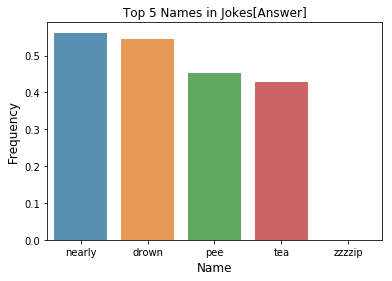

In [9]:
tfidf(df_y,'Jokes[Answer]')

Shape of TF-IDF  (38269, 16593)
sha
jeu
lieu
dernier
quand
bjerre
utke
wohlert
jonas
silas
johan
graae
rgensen
gether
wut
equasion
kno
prbility
rookie
homeworld
kashyyyk
wookies
deid
puir
whit
atween
ck
das
ist
nunst
und
slotermeyer
wenn
git
sagt
gro
zum
kleinen
watchmaker
maintaining
targeting
hypochondriacs
levels
nibelungen
libretto
des
wagner
relief
despicable
polarising
actions
sane
charli
xcx
jap
isnt
practiced
unsafe
growlers
gal
ponzi
fletcher
financially
pension
ensure
backless
tenderizer
eventual
reports
kennt
vier
welche
fl
sse
blondine
jede
neutrality
defeated
gangnam
fathe
odin
hith
wath
ralph
meridian
sensory
editors
selected
volatile
bering
barrow
geddy
peart
lifeson
retarted
tartness
discrimination
grouch
pools
janeiro


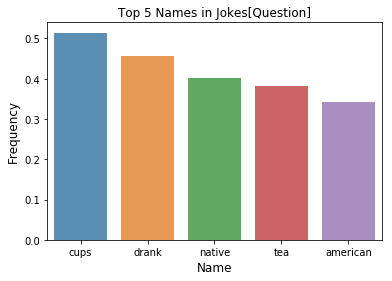

In [10]:
tfidf(df_x,'Jokes[Question]')